In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

The datas used in this notebook were created by the previous notebook (Part2_Data_Cleaning).

## Import the Cleaned Dataset

In [2]:
pollution_o = pd.read_excel('pollution_outliers.xlsx')
pollution_No = pd.read_excel('pollution_NoOutliers.xlsx')

In [3]:
pollution_o.head()

,Unnamed: 0,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,0,-1.596267,-1.229791,-1.347143,0.345329,-0.444944,-0.071057,-0.137408,0,0,1,0,129
1,1,-1.596267,-1.160508,-1.347143,0.345329,-0.427007,-0.071057,-0.137408,0,0,1,0,148
2,2,-1.596267,-0.883375,-1.429278,0.442411,-0.409069,-0.071057,-0.137408,0,0,1,0,159
3,3,-1.596267,-0.606241,-1.429278,0.539493,-0.372993,1.212862,-0.137408,0,0,1,0,181
4,4,-1.596267,-0.606241,-1.429278,0.539493,-0.355055,2.496781,-0.137408,0,0,1,0,138


In [4]:
pollution_No.head()

,Unnamed: 0,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,0,-1.623543,-1.263633,-1.391146,0.379425,-0.552238,-0.049256,-0.153362,0,0,1,0,129
1,1,-1.623543,-1.194004,-1.391146,0.379425,-0.521094,-0.049256,-0.153362,0,0,1,0,148
2,2,-1.623543,-0.915487,-1.473478,0.477000,-0.489950,-0.049256,-0.153362,0,0,1,0,159
3,3,-1.623543,-0.636970,-1.473478,0.574575,-0.427313,12.777280,-0.153362,0,0,1,0,181
4,4,-1.623543,-0.636970,-1.473478,0.574575,-0.396169,25.603817,-0.153362,0,0,1,0,138


Looking at both these tables, we can see that both the datasets have a column that reiterate the index. We will remove these columns.

In [5]:
pollution_o.drop(columns = ['Unnamed: 0'], inplace = True)
pollution_No.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
pollution_o.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,-1.596267,-1.229791,-1.347143,0.345329,-0.444944,-0.071057,-0.137408,0,0,1,0,129
1,-1.596267,-1.160508,-1.347143,0.345329,-0.427007,-0.071057,-0.137408,0,0,1,0,148
2,-1.596267,-0.883375,-1.429278,0.442411,-0.409069,-0.071057,-0.137408,0,0,1,0,159
3,-1.596267,-0.606241,-1.429278,0.539493,-0.372993,1.212862,-0.137408,0,0,1,0,181
4,-1.596267,-0.606241,-1.429278,0.539493,-0.355055,2.496781,-0.137408,0,0,1,0,138


In [7]:
pollution_No.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,-1.623543,-1.263633,-1.391146,0.379425,-0.552238,-0.049256,-0.153362,0,0,1,0,129
1,-1.623543,-1.194004,-1.391146,0.379425,-0.521094,-0.049256,-0.153362,0,0,1,0,148
2,-1.623543,-0.915487,-1.473478,0.477000,-0.489950,-0.049256,-0.153362,0,0,1,0,159
3,-1.623543,-0.636970,-1.473478,0.574575,-0.427313,12.777280,-0.153362,0,0,1,0,181
4,-1.623543,-0.636970,-1.473478,0.574575,-0.396169,25.603817,-0.153362,0,0,1,0,138


---

## Creating x and y parts

##### Dataset with Outliers

In [8]:
x_o = pollution_o.iloc[:, :-1].values
x_o

array([[-1.59626706, -1.22979123, -1.34714315, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59626706, -1.16050789, -1.34714315, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59626706, -0.88337455, -1.4292782 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.58830091, -1.64549124, -1.26500809, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.58830091, -1.64549124, -1.34714315, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.58830091, -1.57620791, -1.26500809, ...,  1.        ,
         0.        ,  0.        ]])

In [9]:
y_o = pollution_o.iloc[:, -1].values
y_o

array([129, 148, 159, ...,  10,   8,  12], dtype=int64)

In [10]:
x_o.shape

(41757, 11)

In [11]:
y_o.shape

(41757,)

We can see that the x-set has 11 columns (all the features) and 41,757 rows, while the y-set has the same number of rows but only 1 columns (the target variable of PM 2.5 levels).

---

##### Dataset without Outliers

In [12]:
x_no = pollution_No.iloc[:, :-1].values
x_no

array([[-1.62354295, -1.2636334 , -1.39114568, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62354295, -1.19400415, -1.39114568, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62354295, -0.91548714, -1.47347807, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.61470256, -1.68140892, -1.30881329, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.61470256, -1.68140892, -1.2264809 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.61470256, -1.68140892, -1.2264809 , ...,  1.        ,
         0.        ,  0.        ]])

In [13]:
y_no = pollution_No.iloc[:, -1].values
y_no

array([129, 148, 159, ...,   8,   7,  12], dtype=int64)

In [14]:
x_no.shape

(39061, 11)

In [15]:
y_no.shape

(39061,)

This is the dataset without outliers. The x-set has 11 columns for all the features and 39,061 rows (less than the previous dataset because there are no outliers in this data). The y-set has the same number of observations and 1 column for the target variable of pollution levels.

---

## Splitting Dataset

##### Dataset with Outliers

In [16]:
from sklearn.model_selection import train_test_split

x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o, test_size = 0.2, random_state = 4)
print('Train set:', x_o_train.shape, y_o_train.shape)
print('Test set:', x_o_test.shape, y_o_test.shape)

Train set: (33405, 11) (33405,)
Test set: (8352, 11) (8352,)


This is the dataset with outliers.

The training set has 33,405 observations and the test set has 8,352 rows. This is a 80:20 split of the full dataset with outliers.

---

##### Dataset without Outliers

In [17]:
x_no_train, x_no_test, y_no_train, y_no_test = train_test_split(x_no, y_no, test_size = 0.2, random_state = 4)
print('Train set:', x_no_train.shape, y_no_train.shape)
print('Test set:', x_no_test.shape, y_no_test.shape)

Train set: (31248, 11) (31248,)
Test set: (7813, 11) (7813,)


This is the dataset without outliers.

The 80:20 split creates fewer observations for the x and y sets because this dataset is smaller (since outliers have been removed). The training set has 31,248 observations and the test set has 7,813 rows.

---

## Linear Regression

##### Data with Outliers

In [18]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_o_train, y_o_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

y_o_train_pred = linear.predict(x_o_train)
mse = mean_squared_error(y_o_train, y_o_train_pred)
r2 = r2_score(y_o_train, y_o_train_pred)

print("The model performance for training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")


y_o_test_pred = linear.predict(x_o_test)
mse_test = mean_squared_error(y_o_test, y_o_test_pred)
r2_test = r2_score(y_o_test, y_o_test_pred)

print("The model performance for test set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2_test))
print("\n")

The model performance for training set
MSE is 6354.688849831677
R2 score is 0.26116091446318657


The model performance for test set
MSE is 5860.165397278776
R2 score is 0.26370806918519796




The regression model using data with outliers, for the training set the r-square score is 0.261, which means that this model explains 26.1% of the total variation in the response variable of the pollution levels.

As for test set, it appears to be slightly higher, the r-square is 0.264, the model explains 26.4% of the total variation, only 26.4% of the data fit the regression model. 

These r-squared values are pretty low.

Now let see how the regression model will be after removing outliers

In [20]:
model_o_lin = linear.fit(x_o_train, y_o_train)
print('intercept', model_o_lin.intercept_)
print('coefficients', model_o_lin.coef_)

intercept 97.000082884244
coefficients [ -3.69566983  60.14483991 -76.53350855 -15.69013443  -9.59182274
  -2.80139247  -8.7184298  -13.14491946 -16.14575635  16.5100653
  12.78061051]


Looking at the above result, we can form a linear regression equation:

${pm2.5} = 97 + (-3.70) * {month} + 60.14 * {dewTemp} + (-76.53) * {temp} + (-15.69) * {pres} + (-9.59) * {windSpeed} + (-2.80) * {cumSnow} + (-8.72) * {cumRain} + (-13.14) * {NE} + (-16.15) * {NW} + 16.51 * {SE} + 12.78 * {SW} $

This shows that a one-month increase leads to a decrease of pm2.5 levels by 3.70 micrograms per cubic meter of air. An increase of one degree celcius in the dew point temperature leads to a decrease of 60.14 micrograms per cubic meter of air. The rest of the coefficients can be interpreted similarly. 

However, it can be seen that the temperature has the largest influence on the level of PM 2.5 where a one degree celcius increase in the temperature reduces the PM 2.5 levels by 77 micrograms per cubic meter of air. 

Interesting finding: It appears that the general temporal change is that as the month increases, the pollution level decreases by 3.70 micrograms per cubic meter of air in Beijing. It would be increasing to see if there are similar trends in other countries. This finding also has real-life influences because it could advice policymakers on the way that they can/should create pollution laws that dictate people's behaviours. For instance, policymakers can create polciies that require people to use less fuel or diesel-consuming vehicles during the earlier months of the year.

##### Data without outliers

In [21]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_no_train, y_no_train)

LinearRegression()

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

y_no_train_pred = linear.predict(x_no_train)
mse = mean_squared_error(y_no_train, y_no_train_pred)
r2 = r2_score(y_no_train, y_no_train_pred)

print("The model performance for training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

y_no_test_pred = linear.predict(x_no_test)
mse_test = mean_squared_error(y_no_test, y_no_test_pred)
r2_test = r2_score(y_no_test, y_no_test_pred)

print("The model performance for tet set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2_test))
print("\n")

The model performance for training set
MSE is 4571.910008415173
R2 score is 0.26784903734005827


The model performance for tet set
MSE is 4408.80036804968
R2 score is 0.27327609522590846




The regression model above is using data without outliers, for the training set the r-square score is 0.268, which means that this model explains 26.8% of the total variation in the response variable.

As for test set, it appears to be slightly higher, the r-square is 0.273, the model explains 27.3% of the total variation in the response variable in pollution level.

Overall, the difference in the r-square value in the first model and the second is close to 2%. It appears that the second regression model without outliers seem to have a better r-squared value than the first model with the outliers, the second model explains slight more variation than the first model

Since the r-squared for both models are still very small, which is around 25% to 27% we will try plotting with the polynomial model to see if it can create a better prediction than the regression

In [23]:
model_no_lin = linear.fit(x_no_train, y_no_train)
print('intercept', model_no_lin.intercept_)
print('coefficients', model_no_lin.coef_)

intercept 91.97886970550792
coefficients [ -2.27356699  52.49952467 -63.12542645 -12.60199199  -9.19960606
  -0.77953072  -3.79061136 -13.15152843 -14.95223515  17.56163617
  10.54212741]


Looking at the above result, we can form a linear regression equation:

${pm2.5} = 92 + (-2.27) * {month} + 52.5 * {dewTemp} + (-63.13) * {temp} + (-12.61) * {pres} + (-9.19) * {windSpeed} + (-0.78) * {cumSnow} + (-3.79) * {cumRain} + (-13.15) * {NE} + (-14.95) * {NW} + 17.56 * {SE} + 10.54 * {SW} $

This shows that a one-month increase leads to a decrease of pm2.5 levels by 2.27 micrograms per cubic meter of air. An increase of one degree celcius in the dew point temperature leads to a decrease of 63.13 micrograms per cubic meter of air. The rest of the coefficients can be interpreted similarly. 

However, it can be seen that the temperature has the largest influence on the level of PM 2.5 where a one degree celcius increase in the temperature reduces the PM 2.5 levels by 63 micrograms per cubic meter of air. The dew point temperature also has a large effect on the pm 2.5 levels where a one degree celcius increase in the dew point temperature leads to a 52.5 micrograms per cubic meter of air increase in pm 2.5 levels.

Interesting finding: Similar to the previous equation, it appears that the general temporal change is that as the month increases, the pollution level decreases by 2.27 micrograms per cubic meter of air in Beijing. It would be increasing to see if there are similar trends in other countries. This finding also has real-life influences because it could advice policymakers on the way that they can/should create pollution laws that dictate people's behaviours. For instance, policymakers can create polciies that require people to use less fuel or diesel-consuming vehicles during the earlier months of the year. Also, it can be seen that the wind directions also have an influence on pollution levels. We would prefer the ind to be coming from the north east or north west because the trend is for pollution levels to decrease in these cases in Beijing. This also gives us an idea of what areas are most polluted (the south east and south west of Beijing). This information gives policymakers an idea of the places they should creatte pollution laws. 

## Polynomial Regression

##### Data with Outliers

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

poly_features_o = PolynomialFeatures(degree = 3)
x_o_train_poly = poly_features_o.fit_transform(x_o_train)
poly_model_o = LinearRegression()
poly_model_o.fit(x_o_train_poly, y_o_train)

LinearRegression()

In [35]:
y_o_train_predict = poly_model_o.predict(x_o_train_poly)
rmse_train_o = np.sqrt(mean_squared_error(y_o_train, y_o_train_predict))
r2_train_o = r2_score(y_o_train, y_o_train_predict)

print("The model performance for training set")
print('MSE is {}'.format(rmse_train_o))
print('R2 score is {}'.format(r2_train_o))
print("\n")

y_o_test_predict = poly_model_o.predict(poly_features_o.fit_transform(x_o_test))
rmse_test_o = np.sqrt(mean_squared_error(y_o_test, y_o_test_predict))
r2_test_o = r2_score(y_o_test, y_o_test_predict)

print("The model performance for test set")
print('MSE is {}'.format(rmse_test_o))
print('R2 score is {}'.format(r2_test_o))
print("\n")

The model performance for training set
MSE is 66.35347753977527
R2 score is 0.488102569981299


The model performance for test set
MSE is 64.0116176315083
R2 score is 0.48517720040084944




The polynomial regression model is using data with outliers, for the training set the r-square score is 0.406, which means that this model explains 40.6% of the total variation, 40.6% of the data fit the regression model.
As for test set, it appears to be almost the same, the r-square is 0.403, the model explains 40.3% of the total variation, 40.3% of the data fit the polynomial regression model.

Compared with the regression model, the r-square in the polynomial model have a higher r-square value, it increases by 20% for both train and test set.

Now will see how the results are using the data without outlier

##### Data without outlier

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

poly_features_no = PolynomialFeatures(degree = 3)
x_no_train_poly = poly_features_no.fit_transform(x_no_train)
poly_model_no = LinearRegression()
poly_model_no.fit(x_no_train_poly, y_no_train)

LinearRegression()

In [38]:
y_no_train_predict = poly_model_no.predict(x_no_train_poly)
rmse_train_no = np.sqrt(mean_squared_error(y_no_train, y_no_train_predict))
r2_train_no = r2_score(y_no_train, y_no_train_predict)

print("The model performance for training set")
print('MSE is {}'.format(rmse_train_no))
print('R2 score is {}'.format(r2_train_no))
print("\n")

y_no_test_predict = poly_model_no.predict(poly_features_no.fit_transform(x_no_test))
rmse_test_no = np.sqrt(mean_squared_error(y_no_test, y_no_test_predict))
r2_test_no = r2_score(y_no_test, y_no_test_predict)

print("The model performance for test set")
print('MSE is {}'.format(rmse_test_no))
print('R2 score is {}'.format(r2_test_no))
print("\n")

The model performance for training set
MSE is 57.166424322104234
R2 score is 0.476658684739109


The model performance for test set
MSE is 102049053.93726125
R2 score is -1716591578348.6108




The model above is polynomial regression without outliers. The r-squared value is 0.39 for the test set and for the training set it is 0.40. This means that in the training set, the model explains 40% of the variation in the response variable. On the other hand, for the test set, the model explains 39% of the variation in the response variable.

After trying four models, it appears that the more reliable model is to include the outliers while conducting polynomial regression. For this case, it does shows that outliers are necessary to keep, there might be other factors affecting the air quality features and the pollution model, which might cause some values to be higher than others.

With the current climate change situation, it is possible that factors that are not recorded in the dataset can impact overall the dataset.

With all the results from the four models, it seems that the polynomial regression model with outliers are the better fit for the pollution level prediction.

The coefficients of the polynomial regression are difficult to interpret due to squared and interaction effects created. Hence, we will not be writing or interepreting the regression equation for polynomial regression. However, we will be visualizing them.

---

## Visualizations

Let us compare the linear and polynomial fits for each of the two datasets. 

In [28]:
import warnings
warnings.filterwarnings('ignore')

##### Dataset with Outliers

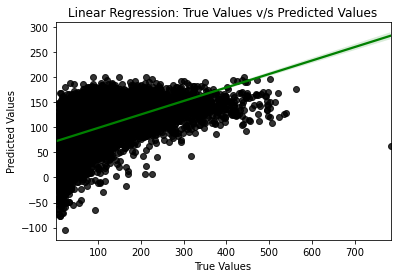

In [29]:
# Linear Regression:

sns.regplot(y_o_test, y_o_test_pred, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'})
plt.title('Linear Regression: True Values v/s Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

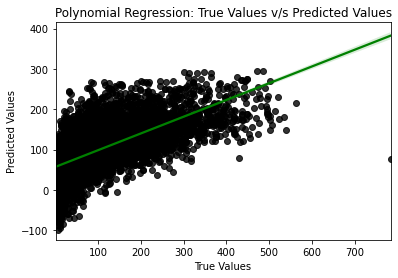

In [30]:
# Polynomial Regression:

sns.regplot(y_o_test, y_o_test_predict, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'})
plt.title('Polynomial Regression: True Values v/s Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

These two regression plots show the comparison between the linear regression fitted values and the ploynomia regression fitted values. The difference is not large (as seen by only a 10% increase in R-squared). However, it can be see that the line is better fitted for for the points in the polynomial regression since it goes through the middle of the cluster of points till the end (where the true values are close to 600 micrograms per cubic meter of air). On the other hand, the linear regression line is not as good a fit because it does not recorgnize the cluster of points at the curved end. 

Hence, the polynomial regression is betteere in this case because the points at the curved end are recognizeed by this regresison making it s a slightly better fit.

---

##### Dataset without Outliers

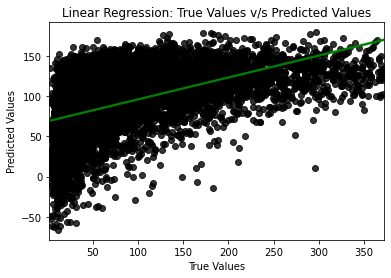

In [31]:
# Linear Regression:

sns.regplot(y_no_test, y_no_test_pred, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'})
plt.title('Linear Regression: True Values v/s Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

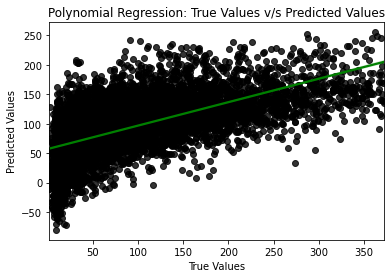

In [32]:
# Polynomial Regression:

sns.regplot(y_no_test, y_no_test_predict, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'})
plt.title('Polynomial Regression: True Values v/s Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

These two regression plots are similar to the regression plots created with the datasets that had outliers. This is because the polynomial regression, in comparison to the linear regression, accoutns for most of the clusters of points whereas, the linear regression does not account for the points at the curveed end of the graph.

However, the polynomial regression for this dataset is not accounting for all the curvature at the end as well as the polynomial regression of the dataset with outliers. This can be seen because the line passes over the bottom-right cluster of points (and not through it). Hence, we would recommend using the dataset with outliers.

---

## Conclusion

After running different regression models, using both with outliers and without outliers, the results of the different regression models shows that the datset with outliers is a better fit for the prediction of the level of pollution based on different attributes of air quality. The model with outliers have a better r-squared values than the ones without outliers. The final model has an r-square value of 0.405 for training set and r-square value of 0.403 for test set. These r-squared values between the training and test set are not much differet. This means that the final model explains about 40% of the variation on the level of pollution is explained by the model

Additionally, there might be more variables in the dataset that is not explained, that could possibly cause the low r-squared

##### The used of the model in real-life situations 

This model can be used in different real-life situations to create a better living environment for the people, such as, be used in the purpose of creating a better and healthier environment. Some attributes of air quality are dangerous for health, therefore reducing pollution level means reducing hazard for human and for the environment. 

##### Economic importance

Air pollution is also important in related to economic as infraestructure and sector contributes a lot to economic growth of a particular country. 
( ADD MORE BETTER POLLUTION LAWS, INFORMATION SPREAD, TRANSPARENCY, HEALTH CONSEQUENCES, ETC.)